In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe
# Para estandarizacion 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Pair Programming Normalización-Estandarización: 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables **predictoras** y una variable **respuesta**. 

Los objetivos del pair programming de hoy son:
- Sobre las variables **predictoras**, en este caso deberéis **estandarizar** estas variables. De nuevo, usad el método que prefiráis.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [2]:
df = pd.read_csv("data/05-primas_normalizadas.csv", index_col = 0)
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,3,33,male,22.705,0,no,northwest,21984.47061,0.045128
1,9,60,female,25.840,0,no,northwest,28923.13692,0.203687


In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,index,age,bmi,children,charges,charges_Sklearn
0,3,33,22.705,0,21984.47061,0.045128
1,9,60,25.840,0,28923.13692,0.203687
2,11,62,26.290,0,27808.72510,0.178221
3,14,27,42.130,0,39611.75770,0.447938
4,19,30,35.300,0,36837.46700,0.384541


In [4]:
numericas.columns

Index(['index', 'age', 'bmi', 'children', 'charges', 'charges_Sklearn'], dtype='object')

In [5]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
index,273.0,661.512821,398.722483,3.00000,298.000000,658.000000,1022.000000,1337.00000
age,273.0,42.457875,13.855314,18.00000,31.000000,45.000000,53.000000,64.00000
bmi,273.0,31.923150,5.440430,17.76500,27.740000,31.920000,35.910000,46.20000
children,273.0,1.135531,1.124567,0.00000,0.000000,1.000000,2.000000,4.00000
charges,273.0,33985.109679,9631.263971,20009.63365,24869.836800,34779.615000,41034.221400,63770.42801
charges_Sklearn,273.0,0.319361,0.220089,0.00000,0.111063,0.337516,0.480443,1.00000


# Estandarización

In [6]:
media = numericas["charges"].mean()
desviacion = numericas["charges"].std() 
print (f' La media de la columna chargues es : {media}')
print (f' La desciación de la columna chargues es : {desviacion}')

 La media de la columna chargues es : 33985.10967915751
 La desciación de la columna chargues es : 9631.263970826632


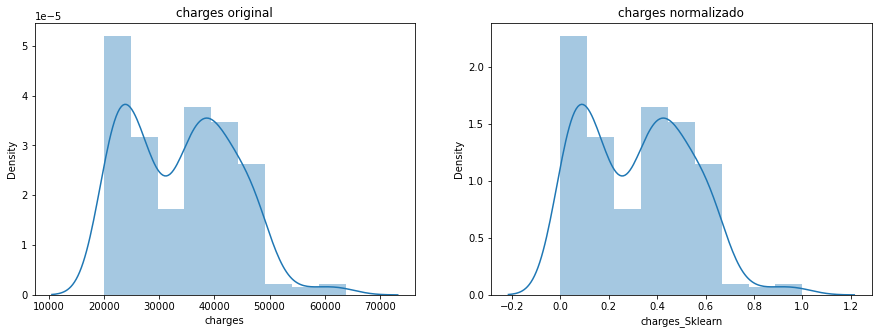

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(numericas['charges'] ,ax = axes[0])
sns.distplot(numericas['charges_Sklearn'], ax = axes[1]);

In [8]:
media_n=np.round(numericas["charges_Sklearn"].mean(),1)
desviacion_n = np.round(numericas["charges_Sklearn"].std(),1)
print (f' La media de la columna charges_Sklearn es : {media_n}')
print (f' La desciación de la columna charges_Sklearn es : {desviacion_n}')

 La media de la columna charges_Sklearn es : 0.3
 La desciación de la columna charges_Sklearn es : 0.2


In [9]:
# iniciamos el método para escalar
scaler = StandardScaler()

In [10]:
# recordemos que la estandarización solo se hace para las variables predictoras. Por lo tanto, lo primero que tenemos que hacer es quitar de nuestro 
## dataframe de "numericas" la columna de la variable respuesta

numericas.drop(["charges", 'charges_Sklearn'], axis = 1, inplace = True)

numericas.head(2)

,index,age,bmi,children
0,3,33,22.705,0
1,9,60,25.840,0


Probamos nuestro primer método : Sklearn StandardScaler

In [11]:
# ajustamos nuestros datos.  
scaler.fit(numericas)

StandardScaler()

In [12]:
# transformamos los datos

X_escaladas = scaler.transform(numericas)

In [13]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,index,age,bmi,children
0,-1.654590,-0.683871,-1.697491,-1.011604
1,-1.639514,1.268419,-1.120191,-1.011604


In [14]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna index es:  2.2041790452265013e-16
La desviación estándar de la columna index es: 1.0018365488382999
-------------------------------------------------------------
La media de la columna age es:  -8.865517192977441e-17
La desviación estándar de la columna age es: 1.0018365488383
-------------------------------------------------------------
La media de la columna bmi es:  -2.391249591500337e-16
La desviación estándar de la columna bmi es: 1.0018365488383
-------------------------------------------------------------
La media de la columna children es:  1.6267004023811816e-16
La desviación estándar de la columna children es: 1.001836548838298
-------------------------------------------------------------


Ya estan estandarizadas ahora lo comprobamos analiticamente

In [15]:
numericas_estandar.head(2)

,index,age,bmi,children
0,-1.654590,-0.683871,-1.697491,-1.011604
1,-1.639514,1.268419,-1.120191,-1.011604


In [16]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
index,273.0,2.204179e-16,1.001837,-1.654590,-0.913368,-0.008826,0.905766,1.697240
age,273.0,-8.865517e-17,1.001837,-1.768476,-0.828485,0.183813,0.762270,1.557647
bmi,273.0,-2.391250e-16,1.001837,-2.607175,-0.770313,-0.000580,0.734165,2.629033
children,273.0,1.626700e-16,1.001837,-1.011604,-1.011604,-0.120740,0.770124,2.551852


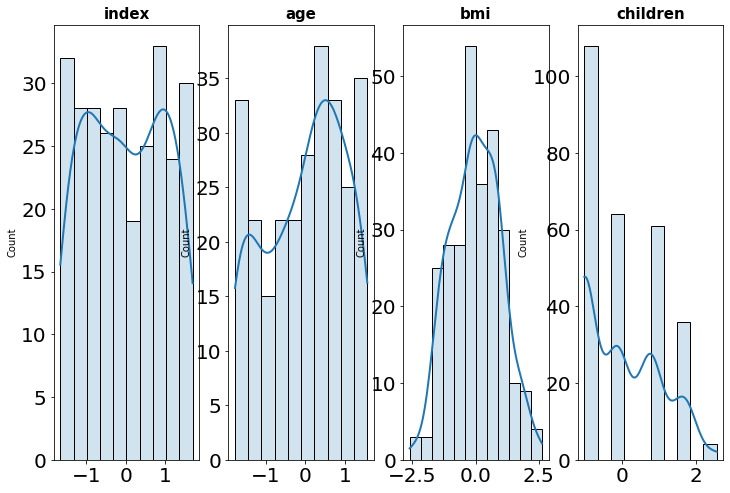

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 8))
columnas_estandar = numericas_estandar.columns
axes = axes.flat
for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("");

Probamos el metodo : Sklearn RobustScaler

In [20]:
# construir el modelo de escalador
robust = RobustScaler()

In [21]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [22]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [23]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,index,age,bmi,children
0,-0.904696,-0.545455,-1.127907,-0.5
1,-0.896409,0.681818,-0.744186,-0.5


In [24]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna index es:  0.00485196203428223
La desviación estándar de la columna index es: 0.5507216615182426
-------------------------------------------------------------
La media de la columna age es:  -0.11555111555111558
La desviación estándar de la columna age es: 0.629787000514216
-------------------------------------------------------------
La media de la columna bmi es:  0.00038557933294755856
La desviación estándar de la columna bmi es: 0.6659032930179087
-------------------------------------------------------------
La media de la columna children es:  0.06776556776556776
La desviación estándar de la columna children es: 0.5622837394616739
-------------------------------------------------------------


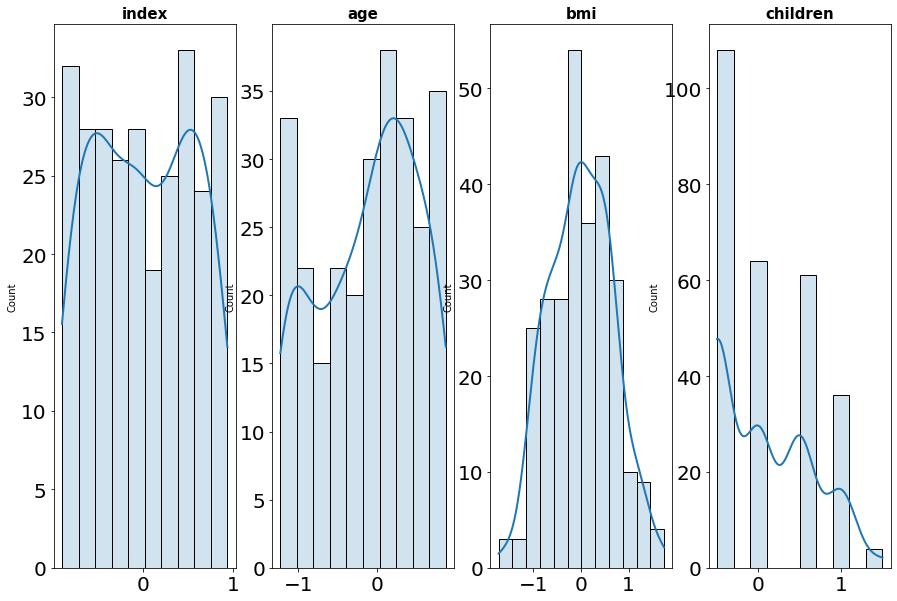

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [27]:
df1=df.copy()

In [28]:
# vamos a guardar este dataframe para seguir trabajando en la siguiente lección de Encoding con el. 
# Pero antes de eso tenemos que juntar los resultados de la estandarización a nuestro dataframe original
df1[numericas_estandar.columns] = numericas_estandar
df1.head()

,index,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-1.654590,-0.683871,male,-1.697491,-1.011604,no,northwest,21984.47061,0.045128
1,-1.639514,1.268419,female,-1.120191,-1.011604,no,northwest,28923.13692,0.203687
2,-1.634489,1.413033,female,-1.037325,-1.011604,yes,southeast,27808.72510,0.178221
3,-1.626951,-1.117713,male,1.879556,-1.011604,yes,southeast,39611.75770,0.447938
4,-1.614388,-0.900792,male,0.621835,-1.011604,yes,southwest,36837.46700,0.384541


In [29]:
# vamos a eliminar la columna de MEDV ya que esta dos veces en el dataframe

df1.drop("charges", axis = 1, inplace = True)

In [30]:
df2=df.copy()

In [31]:
df2[numericas_robust.columns] = numericas_robust
df2.head()

,index,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-0.904696,-0.545455,male,-1.127907,-0.5,no,northwest,21984.47061,0.045128
1,-0.896409,0.681818,female,-0.744186,-0.5,no,northwest,28923.13692,0.203687
2,-0.893646,0.772727,female,-0.689106,-0.5,yes,southeast,27808.72510,0.178221
3,-0.889503,-0.818182,male,1.249694,-0.5,yes,southeast,39611.75770,0.447938
4,-0.882597,-0.681818,male,0.413709,-0.5,yes,southwest,36837.46700,0.384541


In [32]:
df1.head(2)

,index,age,sex,bmi,children,smoker,region,charges_Sklearn
0,-1.654590,-0.683871,male,-1.697491,-1.011604,no,northwest,0.045128
1,-1.639514,1.268419,female,-1.120191,-1.011604,no,northwest,0.203687


In [33]:
df2.head(2)

,index,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,-0.904696,-0.545455,male,-1.127907,-0.5,no,northwest,21984.47061,0.045128
1,-0.896409,0.681818,female,-0.744186,-0.5,no,northwest,28923.13692,0.203687


In [34]:
# guardamos los datos
df1.to_csv("data/05-primas_norm_est_1.csv")

In [36]:
# guardamos los datos
df2.to_csv("data/05-primas_norm_est_2.csv")